### Logistic Regression

In [1]:
dataset_url = "https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download"
import pandas as pd
df = pd.read_csv(dataset_url)

In [2]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# We want to predict survival

#### Data profiling and Inspection

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* total number of rows 891
* total number of columns 12
* Age has 714 not null values remaining are null
* Cabin has 204 not null values remaining are null
* Embarked has 889 not null values remaining are null

In [9]:
import seaborn as sns

<Axes: >

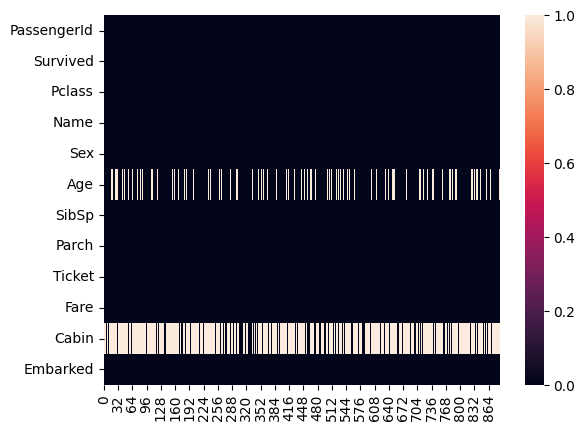

In [10]:
sns.heatmap(df.isnull().transpose())

In [11]:
df.isnull().sum()/len(df.isnull())

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age contains almost 20% data missing
* Cabin contains almost 77% data missing
* Embarked contains 0.2% data missing

### EDA(Exploratory Data Analysis)

In [12]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Distribution of target or label Survived column

<Axes: xlabel='Survived', ylabel='count'>

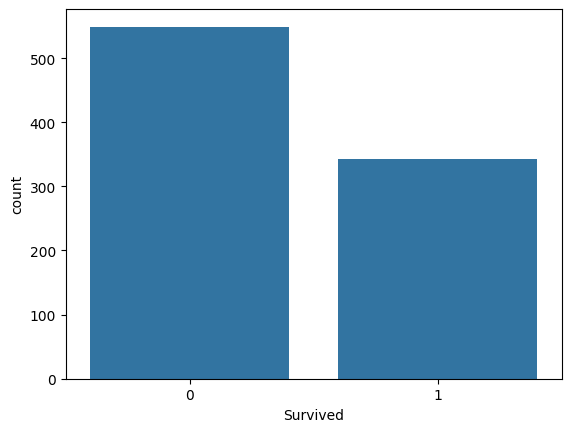

In [13]:
sns.countplot(x= "Survived", data=df)

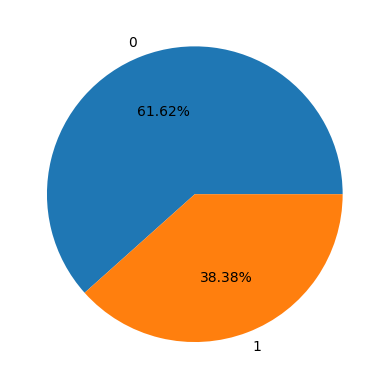

In [14]:
import matplotlib.pyplot as plt
s = df.Survived.value_counts()
plt.pie(s.values, labels=s.index, autopct="%.2f%%")
plt.show()

# It is imbalanced data, so accuracy metric might not be a good metric

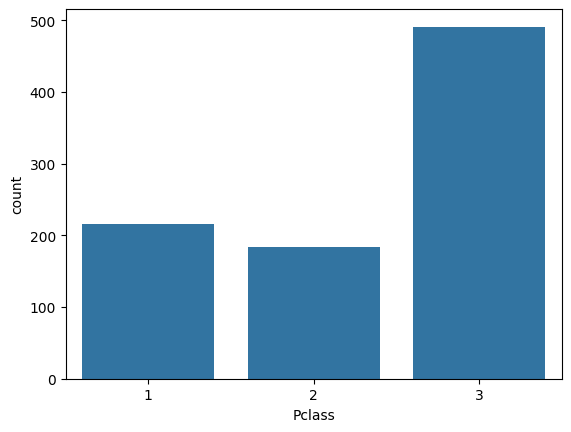

In [15]:
sns.countplot(x='Pclass', data=df)
plt.show()

### Most pessengers are in 3rd class

<Axes: xlabel='Age', ylabel='Count'>

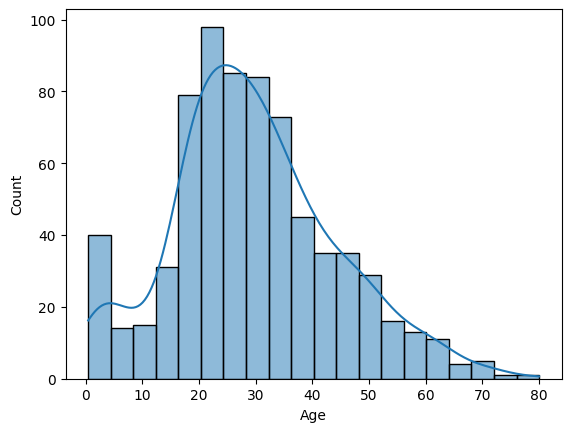

In [16]:
sns.histplot(df.Age, kde=True)

In [17]:
# explain

<Axes: ylabel='Age'>

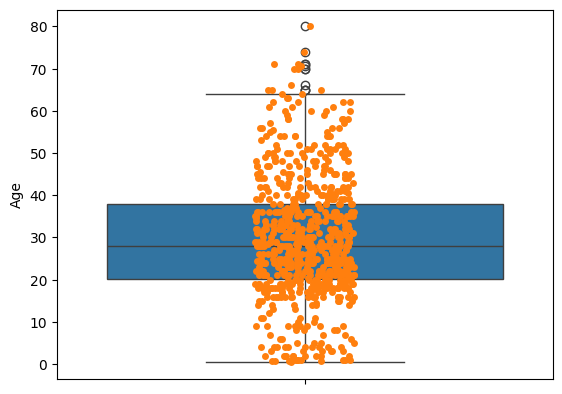

In [18]:
sns.boxplot(df.Age)
sns.stripplot(df.Age)

any

### Is there any relationship between survived and Pclass

<Axes: xlabel='Pclass', ylabel='count'>

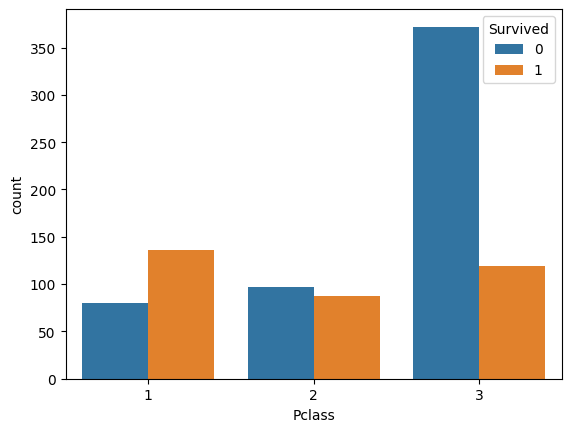

In [19]:
sns.countplot(x="Pclass",hue="Survived", data= df)

* In Pclass  1 most people survived compared to dead
* In Pclass 2 most people dies compared to survived

<Axes: xlabel='Sex', ylabel='count'>

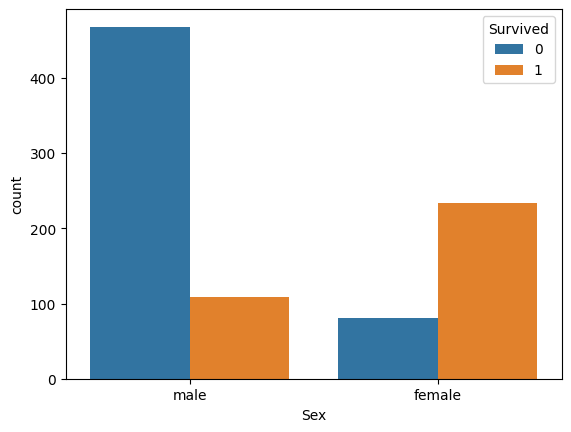

In [20]:
sns.countplot(x="Sex", hue="Survived", data=df)

* Most male died compared to survived
* Most female survived compared to died

In [21]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Is there any relationship between age and pclass

<Axes: ylabel='Age'>

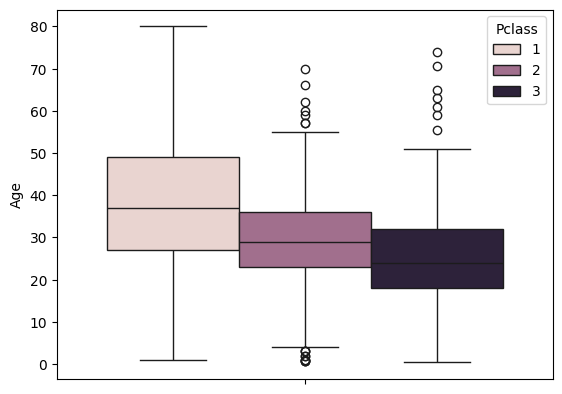

In [22]:
sns.boxplot(y="Age", hue="Pclass", data=df)

In [23]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

* In this data Pclass and Age have some relationship

## Handling missing values

In [24]:
def fill_age(cols):
  age = cols.iloc[0]
  pclass = cols.iloc[1]
  if pd.isna(age) and pclass == 1:
    return 37
  elif pd.isna(age) and pclass ==2:
    return 29
  elif pd.isna(age) and pclass == 3:
    return 24
  else:
    return age


In [25]:
df['Age'] = df[['Age','Pclass']].apply(fill_age, axis='columns')

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cabin contains 77% missing data so we drop the column

In [27]:
del df["Cabin"]

# Embarked column contains only 2 rows missing data so wwe drop the rows

In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# PassengerId , Name, Ticket are irrelevent feature to predict Survived so we drop those column

In [30]:
df.drop(columns=["PassengerId", "Name","Ticket"], inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Identify features and labels

In [32]:
x = df.iloc[:, 1:]
y= df.Survived

In [35]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


# Sex and Embarked are nominal data therefore, we will use OneHotEncoding

In [36]:
x_features = pd.get_dummies(data=x , columns=['Sex','Embarked'],drop_first=True)

In [37]:
x_features

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x_features, y, test_size=0.2, random_state=40)

In [39]:
X_train.shape, y_train.shape

((711, 8), (711,))

# Model: Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [41]:
y_pred = model.predict(X_test)

# Evaluation

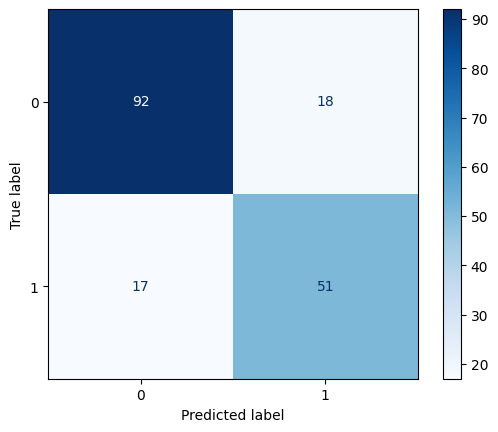

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap="Blues")

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


# Accuracy

In [44]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Precision: {accuracy}")


Precision: 0.8033707865168539


# Precision

In [45]:
precision = precision_score(y_true=y_test, y_pred=y_pred)
print(f"Precision: {precision}")


Precision: 0.7391304347826086


# Recall

In [46]:
recall = recall_score(y_true=y_test, y_pred=y_pred)
print(f"Recall: {recall}")

Recall: 0.75


# F1 Score

In [47]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"F1 score: {f1}")

F1 score: 0.7445255474452556


# Classification Report

In [48]:
from sklearn.metrics import classification_report
print(f"{classification_report(y_true=y_test, y_pred=y_pred)}")

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



# Comparing model Other classification algorithm
* Support Vector Machine
* KNN
* Decission Tree classifier

## SVM

In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"F1_Score of SVM = {f1}")

F1_Score of SVM = 0.44000000000000006


## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) # n_neighbours is hyperparameter to be tuned.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"F1_score of Knn ={f1}")

F1_score of Knn =0.5757575757575757


# F1 score of logistic regression is high among all algorithms. Therefore, LogisticRegression is best for this data

## Decission Tree classifier

In [52]:
# Decission tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = model.predict(X_test)

# F1 score

In [55]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"F1 score of Decission Tree Classifier is {f1}")

F1 score of Decission Tree Classifier is 0.7499999999999999
